In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data =  pd.read_csv('/content/top_insta_influencers_data.csv')

In [ ]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


**1.Data Cleaning**

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   rank               200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB
None


In [ ]:
print(data.describe())

             rank  influence_score
count  200.000000       200.000000
mean   100.500000        81.820000
std     57.879185         8.878159
min      1.000000        22.000000
25%     50.750000        80.000000
50%    100.500000        84.000000
75%    150.250000        86.000000
max    200.000000        93.000000


In [ ]:
print(data.duplicated().sum())

0


In [ ]:
print(data.isnull().sum())

rank                  0
channel_info          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       0
new_post_avg_like     0
total_likes           0
country              62
dtype: int64


In [ ]:
#Filling missing values in country column with mode
data['country'].fillna(data['country'].mode()[0],inplace= True)


In [ ]:
country = data['country'].value_counts()

In [ ]:
country

,count
country,
United States,128
Brazil,13
India,12
Indonesia,7
France,6
Spain,5
United Kingdom,4
Canada,3
Colombia,3


Distribution of Instagram Influencers Across Different Countries

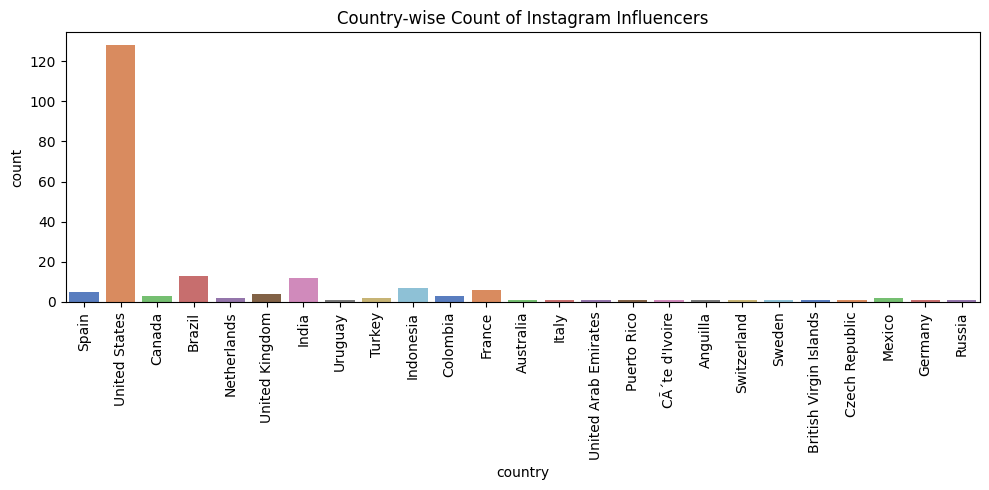

In [ ]:
plt.figure(figsize= [10,5])
sns.countplot(x = data['country'],palette='muted')
plt.title('Country-wise Count of Instagram Influencers')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

 Converting necessary columns to appropriate data types

In [ ]:
# Function to convert k/m/b to numbers
def convert_to_number(x):
    if x.endswith('k'):
        return float(x[:-1]) * 1_000
    elif x.endswith('m'):
        return float(x[:-1]) * 1_000_000
    elif x.endswith('b'):
        return float(x[:-1]) * 1_000_000_000
    else:
        try:
            return float(x)
        except ValueError:
            return None


# Columns to convert
cols_to_convert = ['followers', 'avg_likes', 'new_post_avg_like', 'total_likes','posts']

# Apply conversion and create new numeric columns
for col in cols_to_convert:
    data[col + '_num'] = data[col].apply(convert_to_number)



In [ ]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,followers_num,avg_likes_num,new_post_avg_like_num,total_likes_num,posts_num
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain,475800000.0,8700000.0,6500000.0,2.900000e+10,3300.0
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States,366200000.0,8300000.0,5900000.0,5.740000e+10,6900.0
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,United States,357300000.0,6800000.0,4400000.0,6.000000e+09,890.0
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States,342700000.0,6200000.0,3300000.0,1.150000e+10,1800.0
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States,334100000.0,1900000.0,665300.0,1.250000e+10,6800.0


In [ ]:
data['total_likes_num'] = data['total_likes_num'].fillna(0).astype('int')
data['followers_num']   = data['followers_num'].astype('int')
data['avg_likes_num']   = data['avg_likes_num'].astype('int')
data['new_post_avg_like_num'] = data['new_post_avg_like_num'].astype('int')
data['posts_num'] = data['posts_num'].astype('int')
data['60_day_eng_rate'] = data['60_day_eng_rate'].str.replace('%', '', regex=False).astype(float)

In [ ]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,followers_num,avg_likes_num,new_post_avg_like_num,total_likes_num,posts_num
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39,6.5m,29.0b,Spain,475800000,8700000,6500000,29000000000,3300
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62,5.9m,57.4b,United States,366200000,8300000,5900000,57400000000,6900
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24,4.4m,6.0b,United States,357300000,6800000,4400000,6000000000,890
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97,3.3m,11.5b,United States,342700000,6200000,3300000,11500000000,1800
4,5,therock,91,6.8k,334.1m,1.9m,0.20,665.3k,12.5b,United States,334100000,1900000,665300,12500000000,6800


In [ ]:
data.to_csv('converted_instagram_influencers_csv',index=False)
print('CSV saved successfully!')

CSV saved successfully!


**2.Exploratory Data Analysis (EDA)**

Summary Statistics for numeric columns

In [ ]:
print(data[['influence_score','followers_num','avg_likes_num','new_post_avg_like_num','total_likes_num','60_day_eng_rate']].describe())

       influence_score  followers_num  avg_likes_num  new_post_avg_like_num  \
count       200.000000   2.000000e+02   2.000000e+02           2.000000e+02   
mean         81.820000   7.740950e+07   1.787103e+06           1.208132e+06   
std           8.878159   7.368727e+07   2.193359e+06           1.858322e+06   
min          22.000000   3.280000e+07   6.509900e+04           0.000000e+00   
25%          80.000000   4.000000e+07   5.044000e+05           1.957500e+05   
50%          84.000000   5.005000e+07   1.100000e+06           5.321500e+05   
75%          86.000000   6.890000e+07   2.100000e+06           1.325000e+06   
max          93.000000   4.758000e+08   1.540000e+07           1.260000e+07   

       total_likes_num  60_day_eng_rate  
count     2.000000e+02       199.000000  
mean      3.658112e+09         1.902010  
std       5.561939e+09         3.329719  
min       1.830000e+07         0.010000  
25%       9.968500e+08         0.410000  
50%       2.000000e+09         0.880

 Realtionship between Followers and Engagement

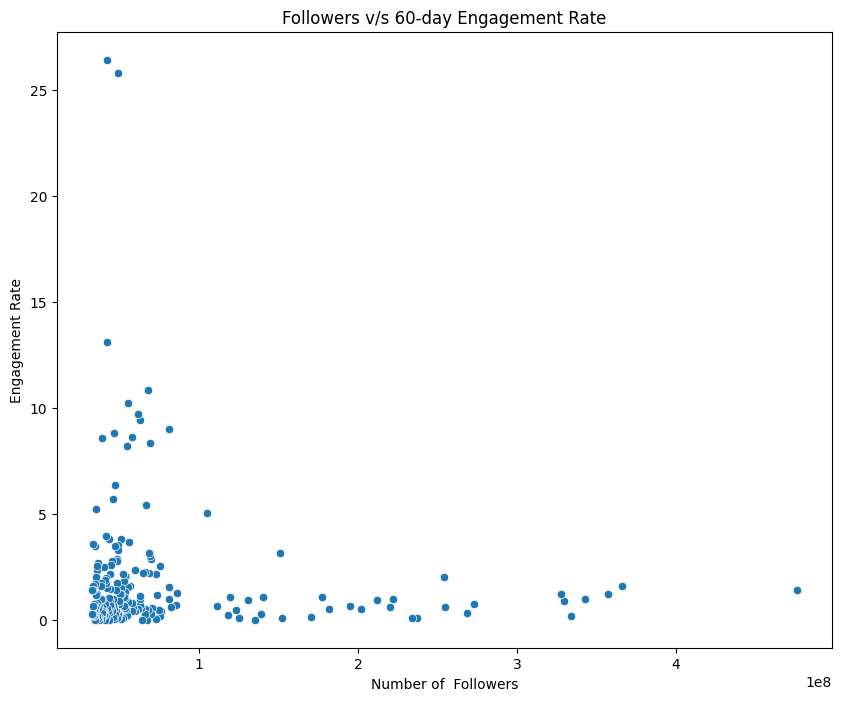

In [ ]:
plt.figure(figsize=[10,8])
sns.scatterplot(data = data, x = 'followers_num',y ='60_day_eng_rate')
plt.title('Followers v/s 60-day Engagement Rate')
plt.xlabel('Number of  Followers')
plt.ylabel('Engagement Rate')
plt.show()


The plot reinforces the classic **inverse relationship** in influencer marketing bigger isn’t always better

1.mega-influencers reach more people

2.micro-influencers provide more value per follower due to higher engagement.

Distribution of Influence Score

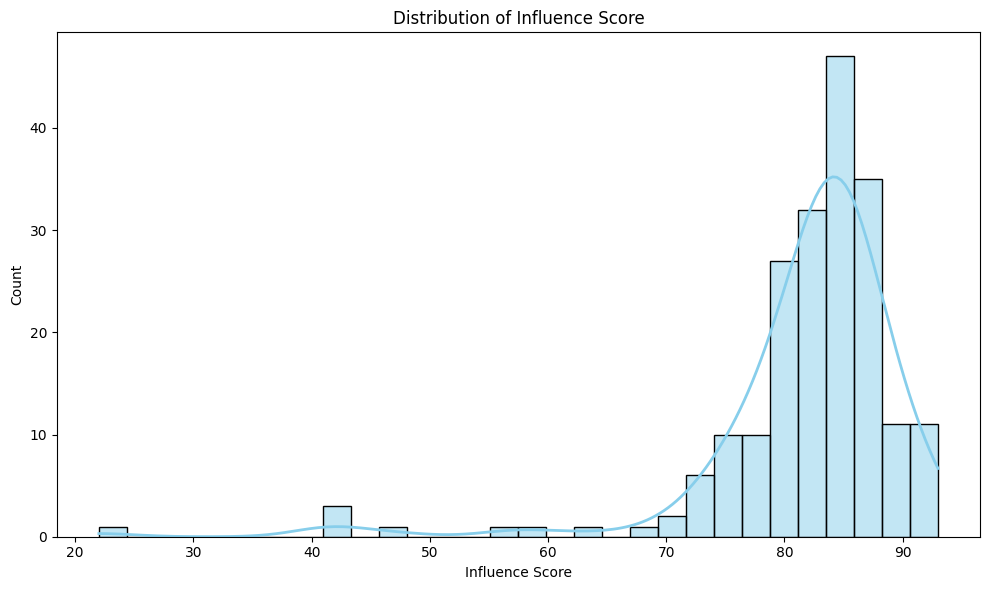

In [ ]:
plt.figure(figsize = [10,6])
sns.histplot(data['influence_score'], bins = 30, kde =True, color = 'skyblue', line_kws={"color": "red", "linewidth": 2})
plt.title('Distribution of Influence Score')
plt.xlabel('Influence Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

The distribution shows that **most influencers** have high influence scores, with the bulk of profiles clustered in the **upper 70s to 90 range**.

**few influencers** fall into the low-score tail, indicating that **weak performers are rare**.

Overall, the group represents a strong and consistently influential population with just a small number of outliers on the lower end.

Top Influencers by Influence Scores

In [ ]:
# Top 20 influencers by influence scores
top_influencers_scores = data.sort_values('influence_score', ascending=False).head(20)


In [ ]:
top_influencers_scores[['channel_info', 'influence_score']]

,channel_info,influence_score
3,selenagomez,93
0,cristiano,92
6,arianagrande,92
7,beyonce,92
20,katyperry,92
5,kimkardashian,91
4,therock,91
1,kyliejenner,91
13,taylorswift,91
9,justinbieber,91


Most Active Countries

In [ ]:
top_countries = data['country'].value_counts().head(10)

In [ ]:
top_countries

,count
country,
United States,128
Brazil,13
India,12
Indonesia,7
France,6
Spain,5
United Kingdom,4
Canada,3
Colombia,3


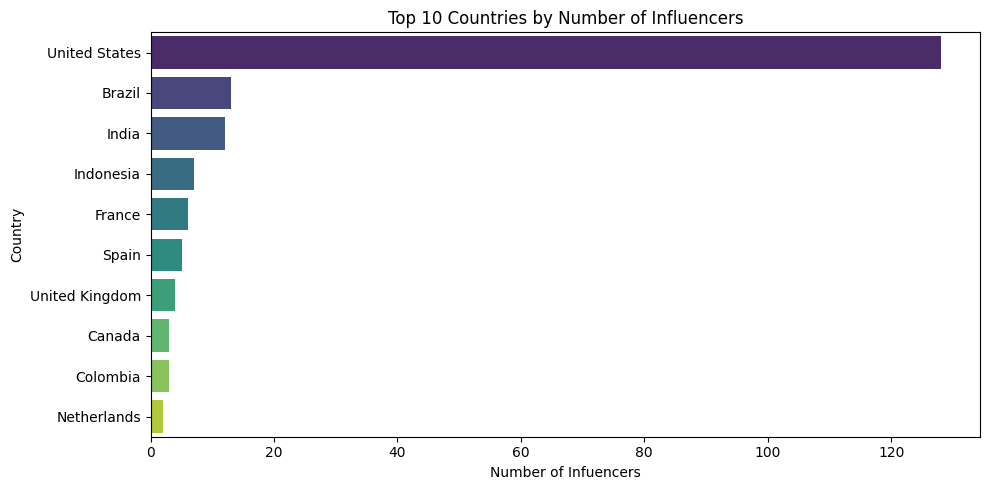

In [ ]:
plt.figure(figsize= [10,5])
sns.barplot(x = top_countries.values, y =  top_countries.index, palette= 'viridis')
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Number of Infuencers')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

The **United States dominates** with a far larger number of influencers than any other country.

 **Brazil** and **India** follow at a distant second and third.

 The remaining countries like Indonesia, France, and Spain show comparatively modest counts.



Most Engaging Influencers

In [ ]:
# Top 10 influencers by engagement rate
top_influencers = data.sort_values('60_day_eng_rate', ascending=False).head(10)

top_influencers[['channel_info','60_day_eng_rate']]

,channel_info,60_day_eng_rate
140,j.m,26.41
102,thv,25.80
138,badbunnypr,13.09
53,tomholland2013,10.83
78,karolg,10.25
69,roses_are_rosie,9.72
64,sooyaaa__,9.43
38,lalalalisa_m,9.00
118,zayn,8.81
75,milliebobbybrown,8.63


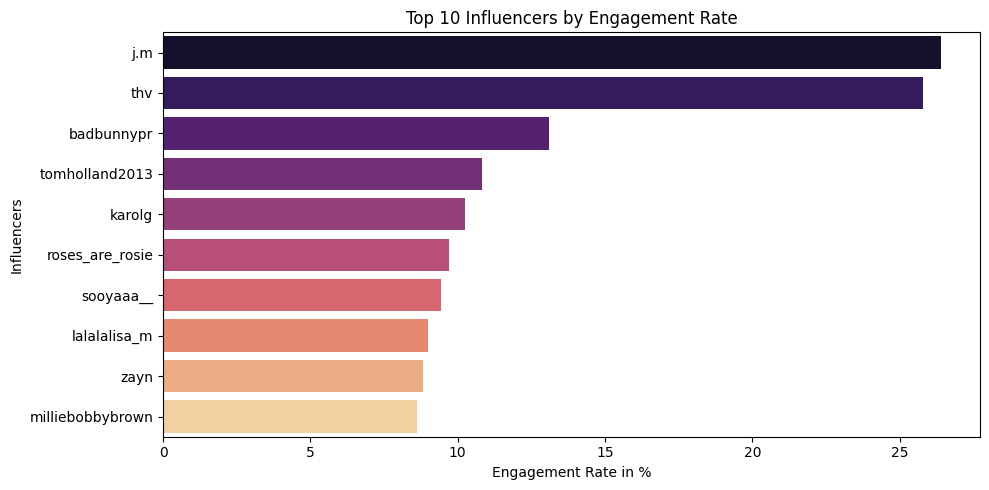

In [ ]:
plt.figure(figsize=[10,5])
sns.barplot(x = '60_day_eng_rate' , y ='channel_info', data = top_influencers , palette = 'magma')
plt.xlabel('Engagement Rate in %')
plt.ylabel('Influencers')
plt.title('Top 10 Influencers by Engagement Rate')
plt.tight_layout()
plt.show()

**j.m** and  **thv** are the top two influencers with the highest engagement rates, both over **25%.**

The engagement rates decrease for each subsequent influencer listed below them.

**milliebobbybrown** has the lowest engagement rate among the ten, at just under **10%**

**3.Feature Engineering**

Engagement related features

In [ ]:
# Converting columns to numeric
data['total_likes_num'] = pd.to_numeric(data['total_likes_num'], errors='coerce')
data['posts_num']       = pd.to_numeric(data['posts_num'], errors='coerce')
data['avg_likes_num']   = pd.to_numeric(data['avg_likes_num'], errors='coerce')
data['followers_num']   = pd.to_numeric(data['followers_num'], errors='coerce')

#Calculating ratios
data['like_follower_ratio'] = data['total_likes_num'] / data['followers_num']
data['post_follower_ratio'] = data['posts_num'] / data['followers_num']
data['avg_likes_ratio']     = data['avg_likes_num'] / data['followers_num']



In [ ]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country,followers_num,avg_likes_num,new_post_avg_like_num,total_likes_num,posts_num,like_follower_ratio,post_follower_ratio,avg_likes_ratio
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39,6.5m,29.0b,Spain,475800000,8700000,6500000,29000000000,3300,60.949979,0.000007,0.018285
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62,5.9m,57.4b,United States,366200000,8300000,5900000,57400000000,6900,156.744948,0.000019,0.022665
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24,4.4m,6.0b,United States,357300000,6800000,4400000,6000000000,890,16.792611,0.000002,0.019032
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97,3.3m,11.5b,United States,342700000,6200000,3300000,11500000000,1800,33.557047,0.000005,0.018092
4,5,therock,91,6.8k,334.1m,1.9m,0.20,665.3k,12.5b,United States,334100000,1900000,665300,12500000000,6800,37.413948,0.000020,0.005687


**4.Model Building**

Predicting Influence Score Using Other Variables

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Defining Feature columns and Target Variable
X = data[['followers_num','avg_likes_num','60_day_eng_rate','new_post_avg_like_num','like_follower_ratio','post_follower_ratio']]
y = data['influence_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

# Standardising features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Initializing and Taining a Random Forest Regressor
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train_scaled , y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error): {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error): 171.79144249999996
R^2 Score: -0.01610029906362387


The RandomForest model achieved an **MSE** of **171.79** and an **R²** of **-0.016**, indicating it performs no better than predicting the mean of the target.

This suggests the current features provide little predictive power for influence_score.

**5. Model Interpretation and Feature Importance**

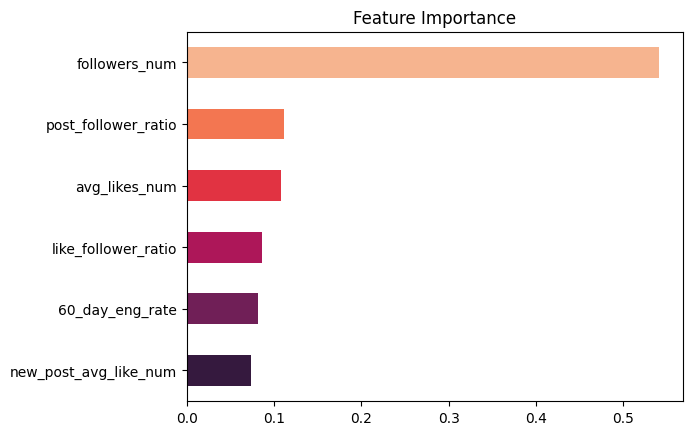

In [ ]:
# Feature  Importances
feature_importances = pd.Series(model.feature_importances_,index = X.columns)
colors = sns.color_palette('rocket', len(feature_importances))
feature_importances.sort_values().plot(kind = 'barh', title = 'Feature Importance',color = colors)
plt.show()

**followers_num** is by far the **most important feature**, with an importance value of over 0.5.

post_follower_ratio and avg_likes_num are the **next most important features**, with values around 0.1.

The remaining features like_follower_ratio, 60_day_eng_rate, and new_post_avg_like_num are the least important among the ones shown, all with values below 0.1.

**6. Visualizing Predictions**

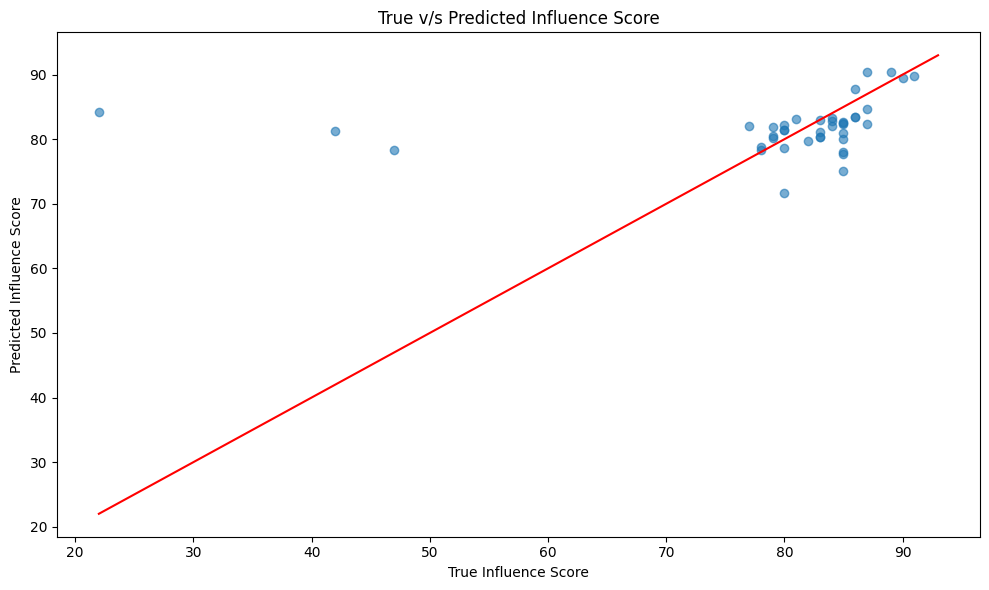

In [ ]:
plt.figure(figsize= [10,6])
plt.scatter(y_test , y_pred , alpha = 0.6)
plt.plot([y.min() , y.max()] , [y.min() , y.max()], '-' , color = 'red')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True v/s Predicted Influence Score')
plt.tight_layout()
plt.show()

**Key Observations:**

**Most predictions** are clustered around the **high true scores (around 80-90)**.

A few points with low true scores (20–50) are predicted with much higher influence scores (80–90)  indicating significant overprediction for those cases.

Overall, the predictions are generally close to the red line, indicating the **model is doing reasonably well**, though there are some notable outliers.